In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from visualize import plot_hist, AUROC
import config

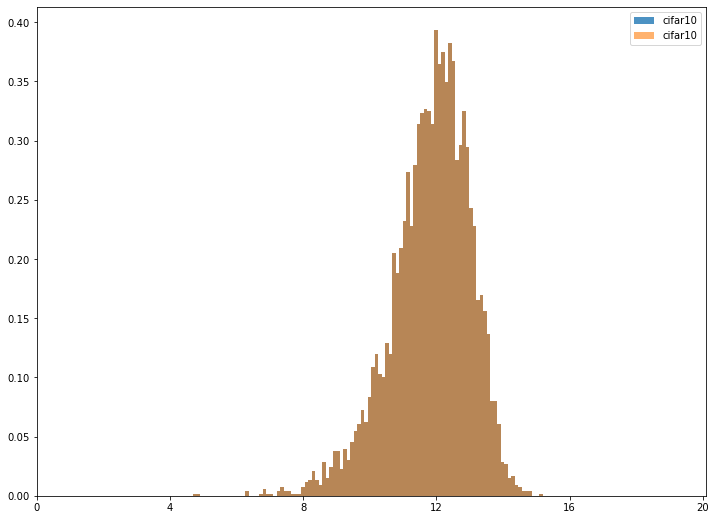

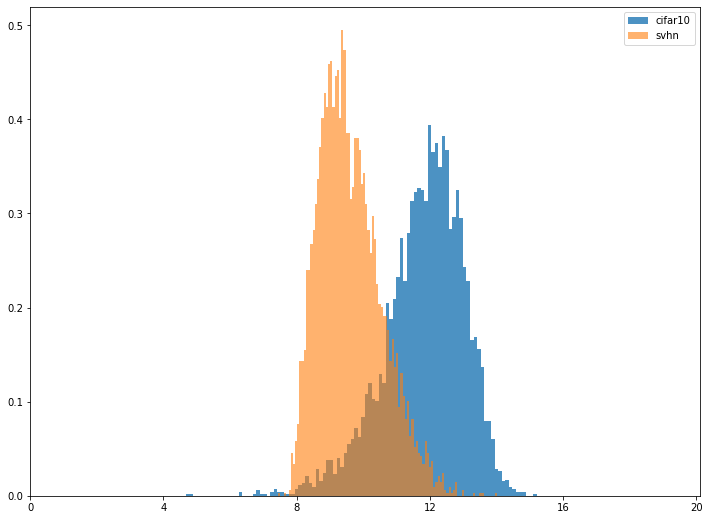

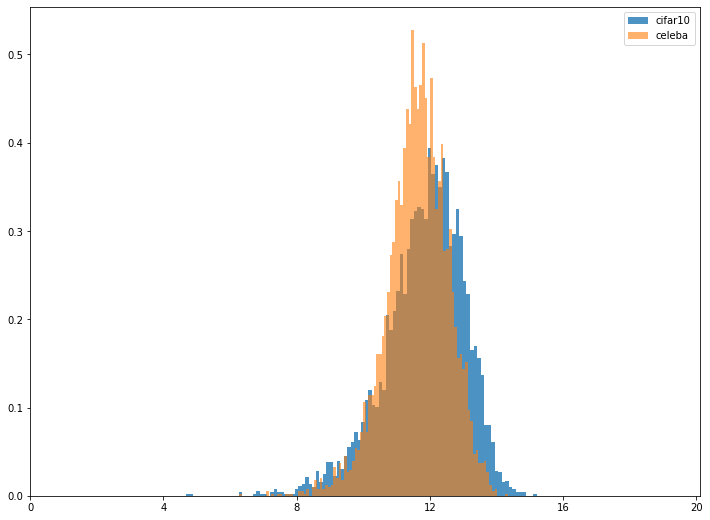

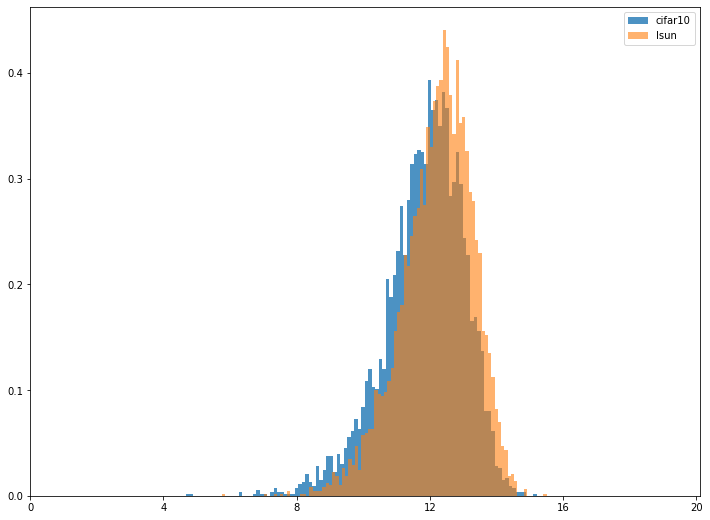

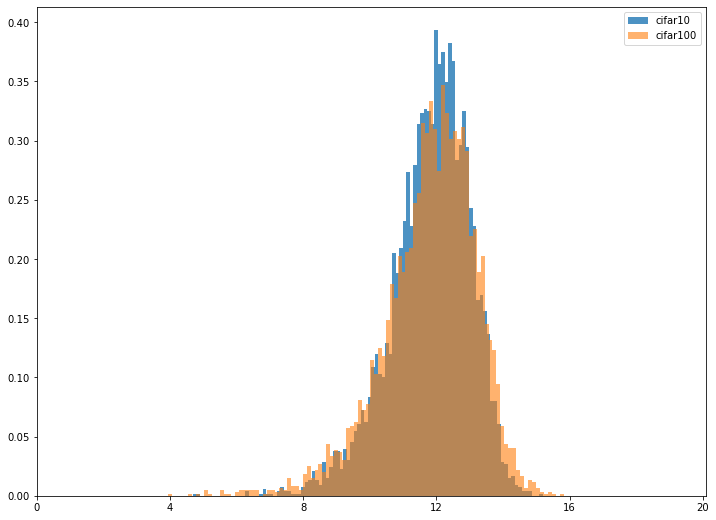

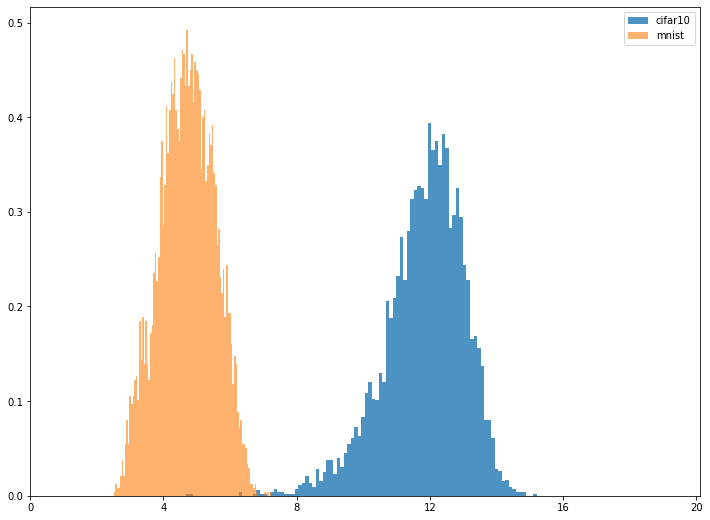

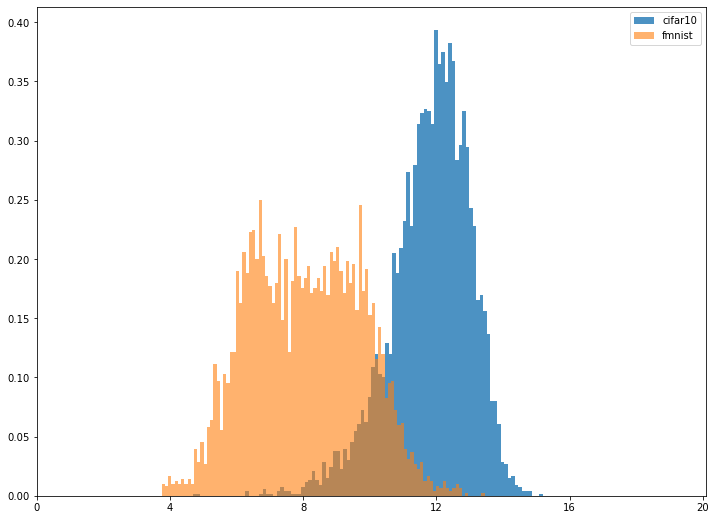

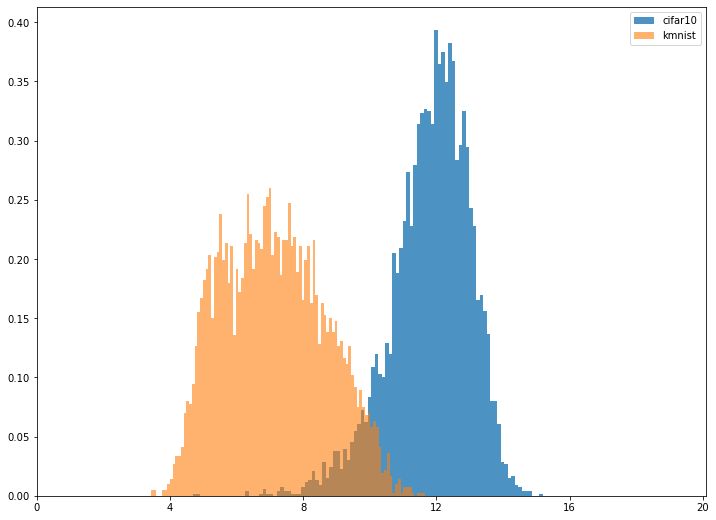

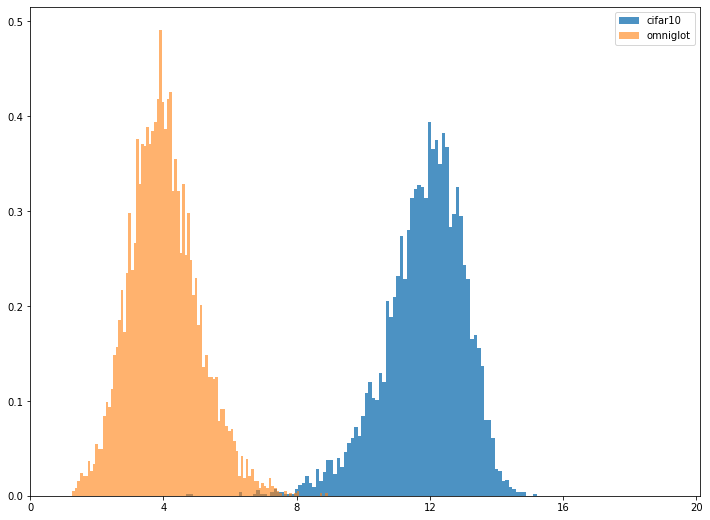

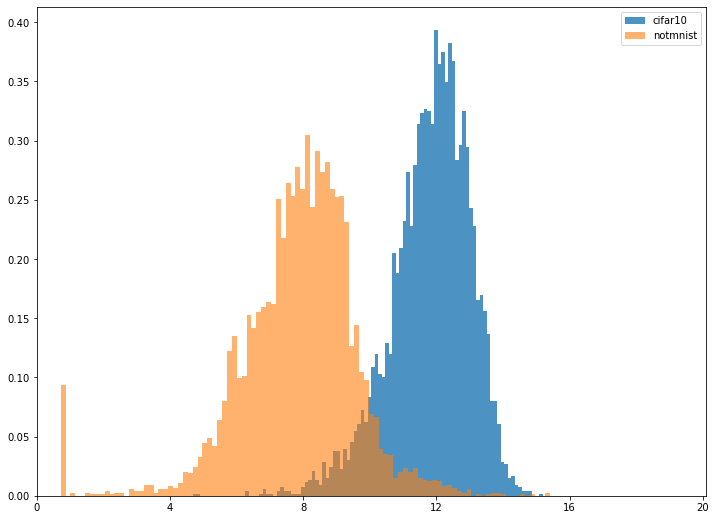

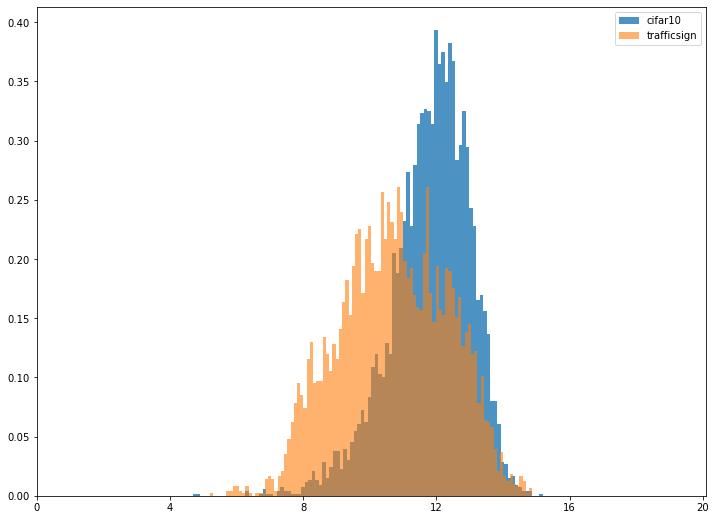

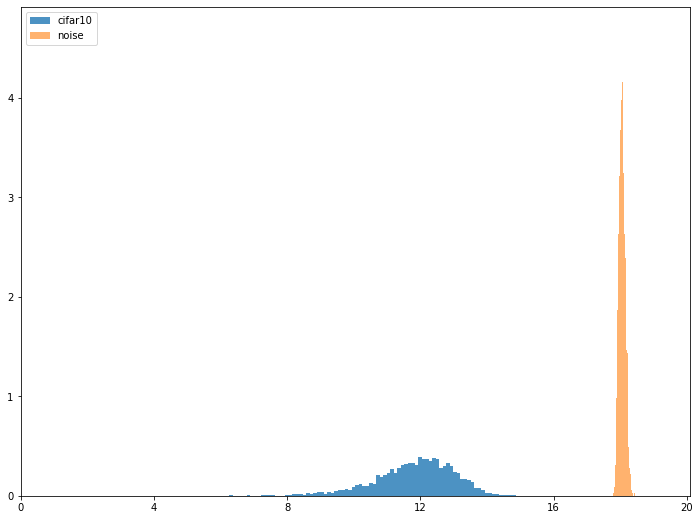

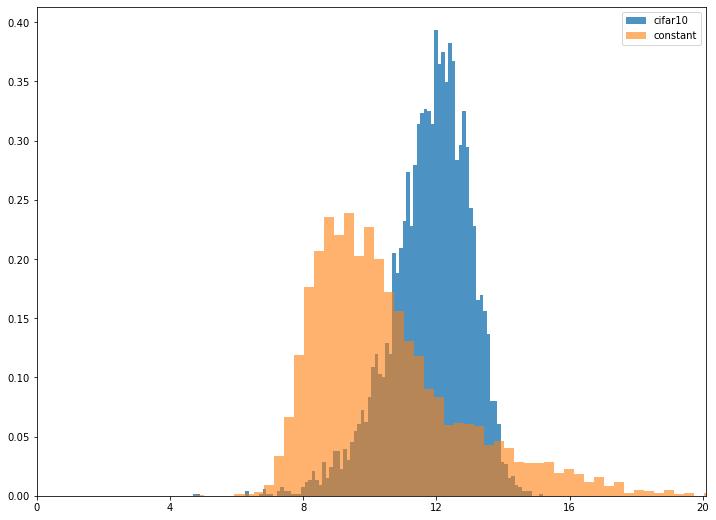

In [9]:
array_path = './NLL_npy'

opt = config.VAE_cifar10
#opt = config.VAE_fmnist

normalize_factor = 1000
if opt.train_dist == 'cifar10':
    max_x = 20.1
elif opt.train_dist == 'fmnist':
    max_x = 10.1


auroc = {}
in_nll = np.load(f'{array_path}/{opt.train_dist}_{opt.train_dist}_nll.npy' )
for ood in opt.ood_list:
    out_nll = np.load(f'{array_path}/{opt.train_dist}_{ood}_nll.npy')
    auroc[ood] = AUROC(in_nll, out_nll, labels=[opt.train_dist, ood], verbose=False)
    
    fig = plt.figure(figsize=(12, 9))
    plt.hist(in_nll / normalize_factor, bins=100, density=True, alpha=0.8, label=opt.train_dist)
    plt.hist(out_nll / normalize_factor, bins=100, density=True, alpha=0.6, label=ood)
    
    plt.xlim(0, max_x)
    plt.xticks(np.arange(0, max_x, 4))
    #plt.title(f'[ID : {opt.train_dist}] [OOD : {ood}]')
    #plt.grid(True)
    plt.legend()
    fig.savefig(f'./images/Histogram_{opt.train_dist}_{ood}_NLL_VAE.png')
    
    plt.show()
    
    
    
